In [3]:
!pip install tensorflow
!pip install openpyxl



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:


split_base_dir = 'C:/Users/vb11574/Desktop/Salmonella_Project/Dataset_2'
train_dir = os.path.join(split_base_dir, 'train')
val_dir = os.path.join(split_base_dir, 'valid')
test_dir = os.path.join(split_base_dir, 'test')

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_path = 'C:/Users/vb11574/Desktop/Salmonella_Project/Vgg16_salmonella_best_model.h5'
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)

EPOCHS = 100

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

final_model_path = 'C:/Users/vb11574/Desktop/Salmonella_Project/Vgg16_salmonella_final_model.h5'
model.save(final_model_path)
print(f"Final model saved at: {final_model_path}")

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.4f}')


Found 4025 images belonging to 2 classes.
Found 1149 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


c:\Users\vb11574\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5804 - loss: 0.6829

c:\Users\vb11574\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


126/126 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.5808 - loss: 0.6826 - val_accuracy: 0.7563 - val_loss: 0.5431
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7235 - loss: 0.5473

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.7236 - loss: 0.5472 - val_accuracy: 0.7876 - val_loss: 0.4724
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.7578 - loss: 0.4984

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.7579 - loss: 0.4983 - val_accuracy: 0.7998 - val_loss: 0.4444
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.7739 - loss: 0.4535

126/126 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.7740 - loss: 0.4534 - val_accuracy: 0.8120 - val_loss: 0.4102
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 988ms/step - accuracy: 0.8043 - loss: 0.4126

126/126 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8042 - loss: 0.4126 - val_accuracy: 0.8233 - val_loss: 0.3952
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.8077 - loss: 0.4025

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8077 - loss: 0.4025 - val_accuracy: 0.8233 - val_loss: 0.3860
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 986ms/step - accuracy: 0.8133 - loss: 0.3854

126/126 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.8133 - loss: 0.3854 - val_accuracy: 0.8181 - val_loss: 0.3843
Epoch 8/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8188 - loss: 0.3750

126/126 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.8187 - loss: 0.3751 - val_accuracy: 0.8198 - val_loss: 0.3712
Epoch 9/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8087 - loss: 0.3758 - val_accuracy: 0.8233 - val_loss: 0.3743
Epoch 10/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8197 - loss: 0.3722

126/126 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.8197 - loss: 0.3722 - val_accuracy: 0.8268 - val_loss: 0.3648
Epoch 11/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8138 - loss: 0.3665

126/126 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.8138 - loss: 0.3665 - val_accuracy: 0.8294 - val_loss: 0.3600
Epoch 12/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 998ms/step - accuracy: 0.8179 - loss: 0.3620

126/126 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.8179 - loss: 0.3620 - val_accuracy: 0.8242 - val_loss: 0.3560
Epoch 13/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8225 - loss: 0.3524

126/126 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.8225 - loss: 0.3524 - val_accuracy: 0.8277 - val_loss: 0.3525
Epoch 14/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8254 - loss: 0.3556

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8254 - loss: 0.3555 - val_accuracy: 0.8338 - val_loss: 0.3519
Epoch 15/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.8227 - loss: 0.3461

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8227 - loss: 0.3462 - val_accuracy: 0.8242 - val_loss: 0.3440
Epoch 16/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.8259 - loss: 0.3437

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8258 - loss: 0.3437 - val_accuracy: 0.8390 - val_loss: 0.3415
Epoch 17/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8149 - loss: 0.3465 - val_accuracy: 0.8346 - val_loss: 0.3457
Epoch 18/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.8219 - loss: 0.3448

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8219 - loss: 0.3448 - val_accuracy: 0.8407 - val_loss: 0.3373
Epoch 19/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.8282 - loss: 0.3418 - val_accuracy: 0.8390 - val_loss: 0.3392
Epoch 20/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8256 - loss: 0.3424 - val_accuracy: 0.8312 - val_loss: 0.3391
Epoch 21/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8274 - loss: 0.3382 - val_accuracy: 0.8364 - val_loss: 0.3386
Epoch 22/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.8469 - loss: 0.3121

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8469 - loss: 0.3123 - val_accuracy: 0.8372 - val_loss: 0.3320
Epoch 23/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8262 - loss: 0.3266 - val_accuracy: 0.8416 - val_loss: 0.3387
Epoch 24/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 978ms/step - accuracy: 0.8339 - loss: 0.3266

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8338 - loss: 0.3266 - val_accuracy: 0.8416 - val_loss: 0.3299
Epoch 25/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8343 - loss: 0.3287 - val_accuracy: 0.8390 - val_loss: 0.3308
Epoch 26/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.8257 - loss: 0.3301

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8258 - loss: 0.3301 - val_accuracy: 0.8442 - val_loss: 0.3254
Epoch 27/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.8181 - loss: 0.3330

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8182 - loss: 0.3329 - val_accuracy: 0.8512 - val_loss: 0.3239
Epoch 28/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8477 - loss: 0.3132 - val_accuracy: 0.8460 - val_loss: 0.3272
Epoch 29/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 974ms/step - accuracy: 0.8362 - loss: 0.3127

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8362 - loss: 0.3128 - val_accuracy: 0.8451 - val_loss: 0.3212
Epoch 30/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 978ms/step - accuracy: 0.8435 - loss: 0.3145

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8435 - loss: 0.3146 - val_accuracy: 0.8486 - val_loss: 0.3205
Epoch 31/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8336 - loss: 0.3207 - val_accuracy: 0.8503 - val_loss: 0.3211
Epoch 32/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.8319 - loss: 0.3244

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8320 - loss: 0.3243 - val_accuracy: 0.8512 - val_loss: 0.3205
Epoch 33/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.8369 - loss: 0.3217

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8370 - loss: 0.3217 - val_accuracy: 0.8512 - val_loss: 0.3185
Epoch 34/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.8388 - loss: 0.3252

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8388 - loss: 0.3251 - val_accuracy: 0.8512 - val_loss: 0.3171
Epoch 35/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8482 - loss: 0.3023 - val_accuracy: 0.8477 - val_loss: 0.3208
Epoch 36/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.8415 - loss: 0.3102

126/126 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8415 - loss: 0.3103 - val_accuracy: 0.8486 - val_loss: 0.3161
Epoch 37/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 988ms/step - accuracy: 0.8544 - loss: 0.3001

126/126 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.8544 - loss: 0.3002 - val_accuracy: 0.8547 - val_loss: 0.3124
Epoch 38/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8367 - loss: 0.3177 - val_accuracy: 0.8477 - val_loss: 0.3149
Epoch 39/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8572 - loss: 0.2987 - val_accuracy: 0.8477 - val_loss: 0.3129
Epoch 40/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.8478 - loss: 0.2983

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8478 - loss: 0.2983 - val_accuracy: 0.8538 - val_loss: 0.3108
Epoch 41/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 972ms/step - accuracy: 0.8415 - loss: 0.3014

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8416 - loss: 0.3014 - val_accuracy: 0.8494 - val_loss: 0.3106
Epoch 42/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8426 - loss: 0.3054 - val_accuracy: 0.8529 - val_loss: 0.3117
Epoch 43/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.8441 - loss: 0.2991

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8441 - loss: 0.2991 - val_accuracy: 0.8477 - val_loss: 0.3092
Epoch 44/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.8394 - loss: 0.3090

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8394 - loss: 0.3090 - val_accuracy: 0.8503 - val_loss: 0.3066
Epoch 45/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.8526 - loss: 0.2974 - val_accuracy: 0.8486 - val_loss: 0.3079
Epoch 46/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8554 - loss: 0.3075 - val_accuracy: 0.8494 - val_loss: 0.3086
Epoch 47/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 972ms/step - accuracy: 0.8419 - loss: 0.3083

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8420 - loss: 0.3082 - val_accuracy: 0.8520 - val_loss: 0.3042
Epoch 48/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8550 - loss: 0.2989 - val_accuracy: 0.8460 - val_loss: 0.3077
Epoch 49/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 982ms/step - accuracy: 0.8490 - loss: 0.3012

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8490 - loss: 0.3011 - val_accuracy: 0.8503 - val_loss: 0.3040
Epoch 50/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 972ms/step - accuracy: 0.8516 - loss: 0.2910

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8516 - loss: 0.2911 - val_accuracy: 0.8503 - val_loss: 0.3028
Epoch 51/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 971ms/step - accuracy: 0.8589 - loss: 0.2910

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8589 - loss: 0.2910 - val_accuracy: 0.8494 - val_loss: 0.3018
Epoch 52/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8461 - loss: 0.2904 - val_accuracy: 0.8451 - val_loss: 0.3060
Epoch 53/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.8419 - loss: 0.3031

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8420 - loss: 0.3030 - val_accuracy: 0.8573 - val_loss: 0.2980
Epoch 54/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8354 - loss: 0.3144 - val_accuracy: 0.8486 - val_loss: 0.3014
Epoch 55/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8521 - loss: 0.2934 - val_accuracy: 0.8520 - val_loss: 0.2984
Epoch 56/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.8545 - loss: 0.3023

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8546 - loss: 0.3022 - val_accuracy: 0.8538 - val_loss: 0.2972
Epoch 57/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 974ms/step - accuracy: 0.8630 - loss: 0.2831

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8629 - loss: 0.2832 - val_accuracy: 0.8529 - val_loss: 0.2958
Epoch 58/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 967ms/step - accuracy: 0.8542 - loss: 0.2996

126/126 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.8543 - loss: 0.2996 - val_accuracy: 0.8529 - val_loss: 0.2947
Epoch 59/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8533 - loss: 0.2847 - val_accuracy: 0.8477 - val_loss: 0.2972
Epoch 60/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8635 - loss: 0.2897 - val_accuracy: 0.8460 - val_loss: 0.3042
Epoch 61/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 972ms/step - accuracy: 0.8558 - loss: 0.2948

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8557 - loss: 0.2948 - val_accuracy: 0.8581 - val_loss: 0.2921
Epoch 62/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.8574 - loss: 0.2886

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8575 - loss: 0.2886 - val_accuracy: 0.8599 - val_loss: 0.2906
Epoch 63/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.8599 - loss: 0.2859 - val_accuracy: 0.8529 - val_loss: 0.2932
Epoch 64/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.8535 - loss: 0.2951

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8535 - loss: 0.2950 - val_accuracy: 0.8590 - val_loss: 0.2887
Epoch 65/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8574 - loss: 0.2847 - val_accuracy: 0.8555 - val_loss: 0.2899
Epoch 66/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8670 - loss: 0.2805 - val_accuracy: 0.8547 - val_loss: 0.2917
Epoch 67/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 982ms/step - accuracy: 0.8599 - loss: 0.2775

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8599 - loss: 0.2776 - val_accuracy: 0.8581 - val_loss: 0.2885
Epoch 68/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.8669 - loss: 0.2817 - val_accuracy: 0.8555 - val_loss: 0.2896
Epoch 69/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.8622 - loss: 0.2878

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8622 - loss: 0.2878 - val_accuracy: 0.8555 - val_loss: 0.2882
Epoch 70/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.8674 - loss: 0.2851

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8673 - loss: 0.2851 - val_accuracy: 0.8564 - val_loss: 0.2877
Epoch 71/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 968ms/step - accuracy: 0.8676 - loss: 0.2712

126/126 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.8676 - loss: 0.2713 - val_accuracy: 0.8581 - val_loss: 0.2864
Epoch 72/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8534 - loss: 0.2831 - val_accuracy: 0.8520 - val_loss: 0.2879
Epoch 73/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.8669 - loss: 0.2767

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8669 - loss: 0.2767 - val_accuracy: 0.8555 - val_loss: 0.2863
Epoch 74/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 968ms/step - accuracy: 0.8631 - loss: 0.2803

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8631 - loss: 0.2802 - val_accuracy: 0.8564 - val_loss: 0.2850
Epoch 75/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 972ms/step - accuracy: 0.8596 - loss: 0.2863

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8596 - loss: 0.2862 - val_accuracy: 0.8590 - val_loss: 0.2846
Epoch 76/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.8607 - loss: 0.2818

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8607 - loss: 0.2818 - val_accuracy: 0.8564 - val_loss: 0.2829
Epoch 77/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8656 - loss: 0.2701 - val_accuracy: 0.8616 - val_loss: 0.2832
Epoch 78/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8586 - loss: 0.2801 - val_accuracy: 0.8538 - val_loss: 0.2933
Epoch 79/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 974ms/step - accuracy: 0.8661 - loss: 0.2844

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8661 - loss: 0.2844 - val_accuracy: 0.8529 - val_loss: 0.2825
Epoch 80/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8613 - loss: 0.2865 - val_accuracy: 0.8607 - val_loss: 0.2833
Epoch 81/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8579 - loss: 0.2787 - val_accuracy: 0.8547 - val_loss: 0.2855
Epoch 82/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8692 - loss: 0.2751 - val_accuracy: 0.8581 - val_loss: 0.2868
Epoch 83/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 972ms/step - accuracy: 0.8673 - loss: 0.2689

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8674 - loss: 0.2690 - val_accuracy: 0.8573 - val_loss: 0.2822
Epoch 84/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8604 - loss: 0.2709 - val_accuracy: 0.8564 - val_loss: 0.2863
Epoch 85/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 972ms/step - accuracy: 0.8602 - loss: 0.2707

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8602 - loss: 0.2708 - val_accuracy: 0.8607 - val_loss: 0.2787
Epoch 86/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8616 - loss: 0.2883 - val_accuracy: 0.8625 - val_loss: 0.2817
Epoch 87/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.8745 - loss: 0.2710

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8744 - loss: 0.2710 - val_accuracy: 0.8581 - val_loss: 0.2777
Epoch 88/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8705 - loss: 0.2636 - val_accuracy: 0.8599 - val_loss: 0.2785
Epoch 89/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 968ms/step - accuracy: 0.8692 - loss: 0.2734

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8692 - loss: 0.2734 - val_accuracy: 0.8607 - val_loss: 0.2769
Epoch 90/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8691 - loss: 0.2628 - val_accuracy: 0.8581 - val_loss: 0.2772
Epoch 91/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.8732 - loss: 0.2779

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8732 - loss: 0.2779 - val_accuracy: 0.8581 - val_loss: 0.2762
Epoch 92/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.8725 - loss: 0.2560

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8725 - loss: 0.2561 - val_accuracy: 0.8660 - val_loss: 0.2747
Epoch 93/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.8648 - loss: 0.2694 - val_accuracy: 0.8616 - val_loss: 0.2754
Epoch 94/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.8724 - loss: 0.2653

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8724 - loss: 0.2653 - val_accuracy: 0.8581 - val_loss: 0.2730
Epoch 95/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8653 - loss: 0.2656 - val_accuracy: 0.8634 - val_loss: 0.2765
Epoch 96/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8719 - loss: 0.2653 - val_accuracy: 0.8625 - val_loss: 0.2778
Epoch 97/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8720 - loss: 0.2628 - val_accuracy: 0.8555 - val_loss: 0.2736
Epoch 98/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8703 - loss: 0.2527 - val_accuracy: 0.8642 - val_loss: 0.2731
Epoch 99/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8734 - loss: 0.2668 - val_accuracy: 0.8599 - val_loss: 0.2750


Final model saved at: C:/Users/vb11574/Desktop/Salmonella_Project/Vgg16_salmonella_final_model.h5
Found 577 images belonging to 2 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 854ms/step - accuracy: 0.8742 - loss: 0.2532
Test Accuracy: 0.8562


Found 4025 images belonging to 2 classes.
Found 1149 images belonging to 2 classes.
Found 577 images belonging to 2 classes.


c:\Users\vb11574\AppData\Local\miniconda3\envs\salmo\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.5669 - loss: 0.6840 - val_accuracy: 0.7537 - val_loss: 0.5252
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.7312 - loss: 0.5336 - val_accuracy: 0.7763 - val_loss: 0.4647
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.7712 - loss: 0.4671 - val_accuracy: 0.7815 - val_loss: 0.4312
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.7674 - loss: 0.4481 - val_accuracy: 0.7763 - val_loss: 0.4124
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.7867 - loss: 0.4216 - val_accuracy: 0.7911 - val_loss: 0.3969
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.7985 - loss: 0.3987 - val_accuracy: 0.7894 - val_loss: 0.3880
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.8039 - loss: 0.3877 - val_accuracy: 0.8094 - val_loss: 0.3789
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.8087 - loss: 0.3814 - val_accu

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\vb11574\\Desktop\\Salmonella_Project\\Models\\1_Initial_Combined_Dataset_Training\\Metrics\\VGG19_ROC_Curve.png'

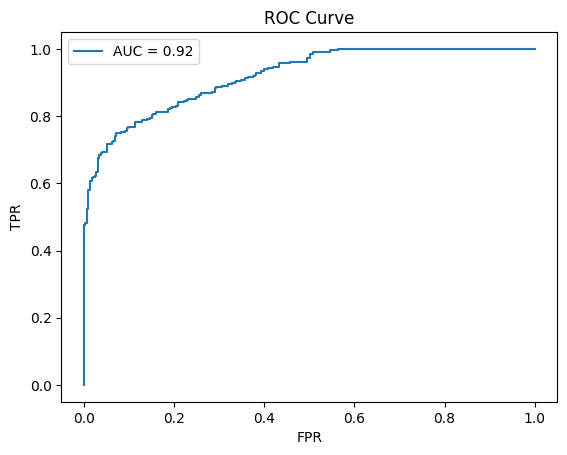

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve,
    auc, precision_recall_curve, average_precision_score
)
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.drawing.image import Image as XLImage
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# --- CONFIG ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
train_dir = r"C:/Users/vb11574/OneDrive - University of Georgia/Desktop/Salmonella_Project/Dataset_2/train"
val_dir = r"C:/Users/vb11574/OneDrive - University of Georgia/Desktop/Salmonella_Project/Dataset_2/valid"
test_dir = r"C:/Users/vb11574/OneDrive - University of Georgia/Desktop/Salmonella_Project/Dataset_2/test"
output_excel_path = r"C:/Users/vb11574/OneDrive - University of Georgia/Desktop/Salmonella_Project/Models/1_Initial_Combined_Dataset_Training/Metrics/VGG19_Metrics_Report.xlsx"

# --- Data Loaders ---
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)
val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)
test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)

# --- Build Model ---
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=out)
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# --- Train ---
history = model.fit(train_gen, validation_data=val_gen, epochs=EPOCHS)

# --- Evaluate ---
test_loss, test_acc = model.evaluate(test_gen)
y_true = test_gen.classes
y_probs = model.predict(test_gen).ravel()
y_pred = (y_probs > 0.5).astype(int)

# --- Metrics ---
report = classification_report(y_true, y_pred, output_dict=True, target_names=["healthy", "salmo"])
conf_matrix = confusion_matrix(y_true, y_pred)
fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_true, y_probs)
pr_auc = average_precision_score(y_true, y_probs)

# --- Excel Output ---
wb = Workbook()
ws = wb.active
ws.title = "VGG19"

# Classification Report
report_df = pd.DataFrame(report).transpose()
for row in dataframe_to_rows(report_df, index=True, header=True):
    ws.append(row)

# Confusion Matrix
ws.append([])
ws.append(["Confusion Matrix"])
conf_df = pd.DataFrame(conf_matrix, index=["Actual Healthy", "Actual Salmo"], columns=["Pred Healthy", "Pred Salmo"])
for row in dataframe_to_rows(conf_df, index=True, header=True):
    ws.append(row)

# Save plots
roc_path = r"C:/Users/vb11574/Desktop/Salmonella_Project/Models/1_Initial_Combined_Dataset_Training/Metrics/VGG19_ROC_Curve.png"
pr_path = r"C:/Users/vb11574/Desktop/Salmonella_Project/Models/1_Initial_Combined_Dataset_Training/Metrics/VGG19_PR_Curve.png"

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.savefig(roc_path)
plt.close()

plt.figure()
plt.plot(recall, precision, label=f"AP = {pr_auc:.2f}", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.savefig(pr_path)
plt.close()

# Add images to Excel
img1 = XLImage(roc_path)
img1.anchor = "I2"
ws.add_image(img1)

img2 = XLImage(pr_path)
img2.anchor = "I20"
ws.add_image(img2)

# Save
wb.save(output_excel_path)
print(f"✅ Report saved to: {output_excel_path}")


# VGG19

In [5]:
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

split_base_dir = 'C:/Users/vb11574/Desktop/Salmonella_Project/Dataset_2'
train_dir = os.path.join(split_base_dir, 'train')
val_dir = os.path.join(split_base_dir, 'valid')
test_dir = os.path.join(split_base_dir, 'test')

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_path = 'C:/Users/vb11574/Desktop/Salmonella_Project/Vgg19_salmonella_best_model.h5'
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)

EPOCHS = 100

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

final_model_path = 'C:/Users/vb11574/Desktop/Salmonella_Project/Vgg19_salmonella_final_model.h5'
model.save(final_model_path)
print(f"Final model saved at: {final_model_path}")

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.4f}')


Found 4025 images belonging to 2 classes.
Found 1149 images belonging to 2 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6118 - loss: 0.6587

126/126 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.6122 - loss: 0.6584 - val_accuracy: 0.7424 - val_loss: 0.5321
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6923 - loss: 0.5608

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.6925 - loss: 0.5606 - val_accuracy: 0.7607 - val_loss: 0.4774
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7619 - loss: 0.4929

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.7618 - loss: 0.4929 - val_accuracy: 0.7720 - val_loss: 0.4441
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7669 - loss: 0.4623

126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.7668 - loss: 0.4623 - val_accuracy: 0.7772 - val_loss: 0.4236
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7603 - loss: 0.4568

126/126 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.7604 - loss: 0.4567 - val_accuracy: 0.7920 - val_loss: 0.4102
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7723 - loss: 0.4407

126/126 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.7723 - loss: 0.4406 - val_accuracy: 0.7876 - val_loss: 0.4034
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7800 - loss: 0.4192

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.7800 - loss: 0.4192 - val_accuracy: 0.7963 - val_loss: 0.3917
Epoch 8/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7855 - loss: 0.4105

126/126 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.7855 - loss: 0.4105 - val_accuracy: 0.8111 - val_loss: 0.3855
Epoch 9/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8058 - loss: 0.3965

126/126 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.8057 - loss: 0.3965 - val_accuracy: 0.8007 - val_loss: 0.3797
Epoch 10/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7895 - loss: 0.3999

126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.7895 - loss: 0.3999 - val_accuracy: 0.8042 - val_loss: 0.3749
Epoch 11/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7908 - loss: 0.3906

126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.7908 - loss: 0.3906 - val_accuracy: 0.8111 - val_loss: 0.3716
Epoch 12/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7985 - loss: 0.3897

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.7985 - loss: 0.3896 - val_accuracy: 0.7955 - val_loss: 0.3702
Epoch 13/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8109 - loss: 0.3674

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8108 - loss: 0.3675 - val_accuracy: 0.8181 - val_loss: 0.3646
Epoch 14/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8121 - loss: 0.3740 - val_accuracy: 0.8103 - val_loss: 0.3667
Epoch 15/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8021 - loss: 0.3800

126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8021 - loss: 0.3799 - val_accuracy: 0.8146 - val_loss: 0.3592
Epoch 16/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7960 - loss: 0.3752

126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.7961 - loss: 0.3752 - val_accuracy: 0.8251 - val_loss: 0.3574
Epoch 17/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8101 - loss: 0.3762

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8101 - loss: 0.3761 - val_accuracy: 0.8138 - val_loss: 0.3546
Epoch 18/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8269 - loss: 0.3539

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8268 - loss: 0.3539 - val_accuracy: 0.8129 - val_loss: 0.3527
Epoch 19/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8194 - loss: 0.3532

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8194 - loss: 0.3532 - val_accuracy: 0.8268 - val_loss: 0.3508
Epoch 20/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8143 - loss: 0.3587

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8143 - loss: 0.3587 - val_accuracy: 0.8216 - val_loss: 0.3488
Epoch 21/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8128 - loss: 0.3587

126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8128 - loss: 0.3586 - val_accuracy: 0.8268 - val_loss: 0.3477
Epoch 22/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8146 - loss: 0.3516

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8147 - loss: 0.3516 - val_accuracy: 0.8312 - val_loss: 0.3458
Epoch 23/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8337 - loss: 0.3399

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8337 - loss: 0.3400 - val_accuracy: 0.8225 - val_loss: 0.3440
Epoch 24/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8263 - loss: 0.3487

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8263 - loss: 0.3487 - val_accuracy: 0.8312 - val_loss: 0.3418
Epoch 25/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.8225 - loss: 0.3544 - val_accuracy: 0.8268 - val_loss: 0.3419
Epoch 26/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8336 - loss: 0.3454

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8336 - loss: 0.3454 - val_accuracy: 0.8285 - val_loss: 0.3394
Epoch 27/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8274 - loss: 0.3394

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8274 - loss: 0.3394 - val_accuracy: 0.8338 - val_loss: 0.3368
Epoch 28/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8120 - loss: 0.3474 - val_accuracy: 0.8277 - val_loss: 0.3375
Epoch 29/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8284 - loss: 0.3377

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8284 - loss: 0.3377 - val_accuracy: 0.8329 - val_loss: 0.3333
Epoch 30/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8337 - loss: 0.3377

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8337 - loss: 0.3376 - val_accuracy: 0.8320 - val_loss: 0.3327
Epoch 31/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8266 - loss: 0.3454

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8266 - loss: 0.3454 - val_accuracy: 0.8320 - val_loss: 0.3317
Epoch 32/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8229 - loss: 0.3425

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8230 - loss: 0.3424 - val_accuracy: 0.8390 - val_loss: 0.3300
Epoch 33/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8379 - loss: 0.3215

126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8378 - loss: 0.3215 - val_accuracy: 0.8312 - val_loss: 0.3289
Epoch 34/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8308 - loss: 0.3343

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8308 - loss: 0.3342 - val_accuracy: 0.8346 - val_loss: 0.3281
Epoch 35/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8294 - loss: 0.3324 - val_accuracy: 0.8390 - val_loss: 0.3291
Epoch 36/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8402 - loss: 0.3218

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8402 - loss: 0.3219 - val_accuracy: 0.8364 - val_loss: 0.3252
Epoch 37/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8253 - loss: 0.3282 - val_accuracy: 0.8381 - val_loss: 0.3255
Epoch 38/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8372 - loss: 0.3320

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8372 - loss: 0.3319 - val_accuracy: 0.8355 - val_loss: 0.3243
Epoch 39/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8431 - loss: 0.3175

126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8430 - loss: 0.3175 - val_accuracy: 0.8277 - val_loss: 0.3230
Epoch 40/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8321 - loss: 0.3245

126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8321 - loss: 0.3245 - val_accuracy: 0.8407 - val_loss: 0.3211
Epoch 41/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8325 - loss: 0.3303 - val_accuracy: 0.8294 - val_loss: 0.3229
Epoch 42/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8399 - loss: 0.3149

126/126 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.8399 - loss: 0.3149 - val_accuracy: 0.8346 - val_loss: 0.3210
Epoch 43/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8529 - loss: 0.2927

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8528 - loss: 0.2929 - val_accuracy: 0.8416 - val_loss: 0.3194
Epoch 44/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8458 - loss: 0.3157 - val_accuracy: 0.8407 - val_loss: 0.3207
Epoch 45/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8427 - loss: 0.3151

126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8427 - loss: 0.3152 - val_accuracy: 0.8399 - val_loss: 0.3157
Epoch 46/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8482 - loss: 0.3157 - val_accuracy: 0.8329 - val_loss: 0.3162
Epoch 47/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8358 - loss: 0.3131

126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8358 - loss: 0.3131 - val_accuracy: 0.8425 - val_loss: 0.3141
Epoch 48/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8414 - loss: 0.3164 - val_accuracy: 0.8381 - val_loss: 0.3143
Epoch 49/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8449 - loss: 0.3057 - val_accuracy: 0.8407 - val_loss: 0.3155
Epoch 50/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8412 - loss: 0.3053

126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8412 - loss: 0.3053 - val_accuracy: 0.8512 - val_loss: 0.3130
Epoch 51/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8401 - loss: 0.3138

126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8401 - loss: 0.3138 - val_accuracy: 0.8381 - val_loss: 0.3123
Epoch 52/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8334 - loss: 0.3166

126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8335 - loss: 0.3165 - val_accuracy: 0.8390 - val_loss: 0.3106
Epoch 53/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8430 - loss: 0.3063

126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8430 - loss: 0.3063 - val_accuracy: 0.8416 - val_loss: 0.3094
Epoch 54/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8404 - loss: 0.3076 - val_accuracy: 0.8381 - val_loss: 0.3098
Epoch 55/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8526 - loss: 0.3034 - val_accuracy: 0.8338 - val_loss: 0.3125
Epoch 56/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8407 - loss: 0.3159 - val_accuracy: 0.8425 - val_loss: 0.3129
Epoch 57/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8420 - loss: 0.3150 - val_accuracy: 0.8381 - val_loss: 0.3095
Epoch 58/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8303 - loss: 0.3135 - val_accuracy: 0.8390 - val_loss: 0.3106


Final model saved at: C:/Users/vb11574/Desktop/Salmonella_Project/Vgg19_salmonella_final_model.h5
Found 577 images belonging to 2 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 847ms/step - accuracy: 0.9097 - loss: 0.2701
Test Accuracy: 0.8700


# VGG 16 with Finetune

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Set paths
split_base_dir = 'C:/Users/vb11574/Desktop/Salmonella_Project/Dataset_2'
train_dir = os.path.join(split_base_dir, 'train')
val_dir = os.path.join(split_base_dir, 'valid')
test_dir = os.path.join(split_base_dir, 'test')

# Image parameters
IMG_SIZE = (224, 224)  # VGG16 input size
BATCH_SIZE = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load VGG16 Model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the initial model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile model with a small learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
checkpoint_path = 'C:/Users/vb11574/Desktop/Salmonella_Project/Vgg16_finetune_salmonella_best_model.h5'
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)

# Train the initial model (Frozen layers) for 30 epochs
FROZEN_EPOCHS = 30

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=FROZEN_EPOCHS,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# Load the best model before fine-tuning
model.load_weights(checkpoint_path)

# **Fine-Tuning Step**
# Unfreeze some deeper layers for fine-tuning
for layer in base_model.layers[-50:]:  # Unfreeze last 50 layers
    layer.trainable = True

# Recompile model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),  # Lower LR
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the fine-tuned model for 70 more epochs
FINE_TUNE_EPOCHS = 70

history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=FINE_TUNE_EPOCHS,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# Save the final fine-tuned model
final_model_path = 'C:/Users/vb11574/Desktop/Salmonella_Project/Vgg16_finetune_salmonella_final_model.h5'
model.save(final_model_path)
print(f"Final fine-tuned model saved at: {final_model_path}")

# Evaluate model on test set
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy after Fine-Tuning: {test_acc:.4f}')


Found 4025 images belonging to 2 classes.
Found 1149 images belonging to 2 classes.


c:\Users\vb11574\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5621 - loss: 0.6877

c:\Users\vb11574\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.5626 - loss: 0.6874 - val_accuracy: 0.7337 - val_loss: 0.5554 - learning_rate: 1.0000e-04
Epoch 2/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 996ms/step - accuracy: 0.7340 - loss: 0.5483

126/126 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.7340 - loss: 0.5482 - val_accuracy: 0.7720 - val_loss: 0.4883 - learning_rate: 1.0000e-04
Epoch 3/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 987ms/step - accuracy: 0.7724 - loss: 0.4883

126/126 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.7724 - loss: 0.4882 - val_accuracy: 0.7903 - val_loss: 0.4411 - learning_rate: 1.0000e-04
Epoch 4/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 980ms/step - accuracy: 0.7776 - loss: 0.4552

126/126 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.7777 - loss: 0.4551 - val_accuracy: 0.8068 - val_loss: 0.4219 - learning_rate: 1.0000e-04
Epoch 5/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 982ms/step - accuracy: 0.7996 - loss: 0.4208

126/126 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.7996 - loss: 0.4207 - val_accuracy: 0.8068 - val_loss: 0.4115 - learning_rate: 1.0000e-04
Epoch 6/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 987ms/step - accuracy: 0.8004 - loss: 0.4080

126/126 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.8004 - loss: 0.4079 - val_accuracy: 0.8129 - val_loss: 0.3910 - learning_rate: 1.0000e-04
Epoch 7/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 994ms/step - accuracy: 0.8083 - loss: 0.3941

126/126 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.8083 - loss: 0.3940 - val_accuracy: 0.8103 - val_loss: 0.3893 - learning_rate: 1.0000e-04
Epoch 8/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 988ms/step - accuracy: 0.7990 - loss: 0.3927

126/126 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.7990 - loss: 0.3927 - val_accuracy: 0.8111 - val_loss: 0.3784 - learning_rate: 1.0000e-04
Epoch 9/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.8189 - loss: 0.3716

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8189 - loss: 0.3716 - val_accuracy: 0.8207 - val_loss: 0.3728 - learning_rate: 1.0000e-04
Epoch 10/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.8085 - loss: 0.3663

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8085 - loss: 0.3664 - val_accuracy: 0.8216 - val_loss: 0.3653 - learning_rate: 1.0000e-04
Epoch 11/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.8105 - loss: 0.3741

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8105 - loss: 0.3740 - val_accuracy: 0.8225 - val_loss: 0.3608 - learning_rate: 1.0000e-04
Epoch 12/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.8143 - loss: 0.3696 - val_accuracy: 0.8207 - val_loss: 0.3647 - learning_rate: 1.0000e-04
Epoch 13/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8216 - loss: 0.3595 - val_accuracy: 0.8242 - val_loss: 0.3609 - learning_rate: 1.0000e-04
Epoch 14/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 976ms/step - accuracy: 0.8210 - loss: 0.3506

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8210 - loss: 0.3506 - val_accuracy: 0.8242 - val_loss: 0.3516 - learning_rate: 1.0000e-04
Epoch 15/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8291 - loss: 0.3476 - val_accuracy: 0.8268 - val_loss: 0.3565 - learning_rate: 1.0000e-04
Epoch 16/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8242 - loss: 0.3439 - val_accuracy: 0.8268 - val_loss: 0.3545 - learning_rate: 1.0000e-04
Epoch 17/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8161 - loss: 0.3541 - val_accuracy: 0.8277 - val_loss: 0.3520 - learning_rate: 1.0000e-04
Epoch 18/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 992ms/step - accuracy: 0.8256 - loss: 0.3319

126/126 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.8255 - loss: 0.3320 - val_accuracy: 0.8303 - val_loss: 0.3475 - learning_rate: 1.0000e-04
Epoch 19/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 975ms/step - accuracy: 0.8357 - loss: 0.3359

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8357 - loss: 0.3359 - val_accuracy: 0.8329 - val_loss: 0.3429 - learning_rate: 1.0000e-04
Epoch 20/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8288 - loss: 0.3488 - val_accuracy: 0.8338 - val_loss: 0.3438 - learning_rate: 1.0000e-04
Epoch 21/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.8308 - loss: 0.3293

126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8308 - loss: 0.3293 - val_accuracy: 0.8320 - val_loss: 0.3366 - learning_rate: 1.0000e-04
Epoch 22/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8457 - loss: 0.3229 - val_accuracy: 0.8329 - val_loss: 0.3391 - learning_rate: 1.0000e-04
Epoch 23/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8342 - loss: 0.3262 - val_accuracy: 0.8355 - val_loss: 0.3421 - learning_rate: 1.0000e-04
Epoch 24/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.8304 - loss: 0.3317 - val_accuracy: 0.8372 - val_loss: 0.3380 - learning_rate: 1.0000e-04
Epoch 25/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 976ms/step - accuracy: 0.8442 - loss: 0.3129

126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8441 - loss: 0.3130 - val_accuracy: 0.8390 - val_loss: 0.3282 - learning_rate: 1.0000e-04
Epoch 26/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8207 - loss: 0.3361 - val_accuracy: 0.8399 - val_loss: 0.3326 - learning_rate: 1.0000e-04
Epoch 27/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8267 - loss: 0.3294 - val_accuracy: 0.8416 - val_loss: 0.3293 - learning_rate: 1.0000e-04
Epoch 28/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8398 - loss: 0.3157 - val_accuracy: 0.8372 - val_loss: 0.3329 - learning_rate: 1.0000e-04
Epoch 29/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8377 - loss: 0.3116 - val_accuracy: 0.8390 - val_loss: 0.3358 - learning_rate: 1.0000e-04
Epoch 30/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 987ms/step - accuracy: 0.8418 - loss: 0.3114

126/126 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8417 - loss: 0.3115 - val_accuracy: 0.8407 - val_loss: 0.3254 - learning_rate: 1.0000e-04
Epoch 1/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8379 - loss: 0.3251

126/126 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.8379 - loss: 0.3250 - val_accuracy: 0.8564 - val_loss: 0.2854 - learning_rate: 1.0000e-05
Epoch 2/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8695 - loss: 0.2606

126/126 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.8695 - loss: 0.2606 - val_accuracy: 0.8695 - val_loss: 0.2345 - learning_rate: 1.0000e-05
Epoch 3/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8834 - loss: 0.2269

126/126 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.8834 - loss: 0.2269 - val_accuracy: 0.8816 - val_loss: 0.2248 - learning_rate: 1.0000e-05
Epoch 4/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8813 - loss: 0.2226

126/126 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.8814 - loss: 0.2226 - val_accuracy: 0.8842 - val_loss: 0.2151 - learning_rate: 1.0000e-05
Epoch 5/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.8975 - loss: 0.2104 - val_accuracy: 0.8764 - val_loss: 0.2356 - learning_rate: 1.0000e-05
Epoch 6/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9007 - loss: 0.2048

126/126 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.9007 - loss: 0.2047 - val_accuracy: 0.8964 - val_loss: 0.2046 - learning_rate: 1.0000e-05
Epoch 7/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.9097 - loss: 0.1810 - val_accuracy: 0.8895 - val_loss: 0.2130 - learning_rate: 1.0000e-05
Epoch 8/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9027 - loss: 0.1926

126/126 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.9027 - loss: 0.1926 - val_accuracy: 0.9025 - val_loss: 0.1948 - learning_rate: 1.0000e-05
Epoch 9/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9158 - loss: 0.1707

126/126 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.9159 - loss: 0.1707 - val_accuracy: 0.9008 - val_loss: 0.1887 - learning_rate: 1.0000e-05
Epoch 10/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.9310 - loss: 0.1537 - val_accuracy: 0.9008 - val_loss: 0.2101 - learning_rate: 1.0000e-05
Epoch 11/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.9323 - loss: 0.1399 - val_accuracy: 0.8999 - val_loss: 0.2236 - learning_rate: 1.0000e-05
Epoch 12/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.9401 - loss: 0.1417 - val_accuracy: 0.8808 - val_loss: 0.2368 - learning_rate: 1.0000e-05
Epoch 13/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9465 - loss: 0.1223 - val_accuracy: 0.9017 - val_loss: 0.1998 - learning_rate: 1.0000e-05
Epoch 14/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9466 - loss: 0.1200

126/126 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.9466 - loss: 0.1199 - val_accuracy: 0.9234 - val_loss: 0.1720 - learning_rate: 1.0000e-05
Epoch 15/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.9532 - loss: 0.1077 - val_accuracy: 0.9025 - val_loss: 0.2139 - learning_rate: 1.0000e-05
Epoch 16/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9398 - loss: 0.1273 - val_accuracy: 0.9121 - val_loss: 0.1798 - learning_rate: 1.0000e-05
Epoch 17/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9568 - loss: 0.0978

126/126 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.9567 - loss: 0.0979 - val_accuracy: 0.9252 - val_loss: 0.1634 - learning_rate: 1.0000e-05
Epoch 18/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.9657 - loss: 0.0908 - val_accuracy: 0.9077 - val_loss: 0.2169 - learning_rate: 1.0000e-05
Epoch 19/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.9552 - loss: 0.1053 - val_accuracy: 0.9225 - val_loss: 0.1956 - learning_rate: 1.0000e-05
Epoch 20/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9721 - loss: 0.0755 - val_accuracy: 0.9252 - val_loss: 0.1674 - learning_rate: 1.0000e-05
Epoch 21/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.9733 - loss: 0.0696 - val_accuracy: 0.9295 - val_loss: 0.2206 - learning_rate: 1.0000e-05
Epoch 22/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.9699 - loss: 0.0793 - val_accuracy: 0.9217 - val_loss: 0.1949 - learning_rate: 1.0000e-05
Epoch 23/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy

126/126 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.9817 - loss: 0.0452 - val_accuracy: 0.9504 - val_loss: 0.1484 - learning_rate: 5.0000e-06
Epoch 28/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9885 - loss: 0.0336 - val_accuracy: 0.9452 - val_loss: 0.1673 - learning_rate: 5.0000e-06
Epoch 29/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.9877 - loss: 0.0351 - val_accuracy: 0.9426 - val_loss: 0.1819 - learning_rate: 5.0000e-06
Epoch 30/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.9906 - loss: 0.0280 - val_accuracy: 0.9426 - val_loss: 0.1957 - learning_rate: 5.0000e-06
Epoch 31/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.9881 - loss: 0.0330 - val_accuracy: 0.9521 - val_loss: 0.1555 - learning_rate: 5.0000e-06
Epoch 32/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.9938 - loss: 0.0255 - val_accuracy: 0.9487 - val_loss: 0.1750 - learning_rate: 5.0000e-06
Epoch 33/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy

Final fine-tuned model saved at: C:/Users/vb11574/Desktop/Salmonella_Project/Vgg16_finetune_salmonella_final_model.h5
Found 577 images belonging to 2 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 830ms/step - accuracy: 0.9536 - loss: 0.1594
Test Accuracy after Fine-Tuning: 0.9411


# VGG 19 with Finetune

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Set paths
split_base_dir = 'C:/Users/vb11574/Desktop/Salmonella_Project/Dataset_2'
train_dir = os.path.join(split_base_dir, 'train')
val_dir = os.path.join(split_base_dir, 'valid')
test_dir = os.path.join(split_base_dir, 'test')

# Image parameters
IMG_SIZE = (224, 224)  # VGG16 input size
BATCH_SIZE = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load VGG19 Model without top layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the initial model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile model with a small learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
checkpoint_path = 'C:/Users/vb11574/Desktop/Salmonella_Project/Vgg19_finetune_salmonella_best_model.h5'
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)

# Train the initial model (Frozen layers) for 30 epochs
FROZEN_EPOCHS = 30

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=FROZEN_EPOCHS,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# Load the best model before fine-tuning
model.load_weights(checkpoint_path)

# **Fine-Tuning Step**
# Unfreeze some deeper layers for fine-tuning
for layer in base_model.layers[-50:]:  # Unfreeze last 50 layers
    layer.trainable = True

# Recompile model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),  # Lower LR
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the fine-tuned model for 70 more epochs
FINE_TUNE_EPOCHS = 70

history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=FINE_TUNE_EPOCHS,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# Save the final fine-tuned model
final_model_path = 'C:/Users/vb11574/Desktop/Salmonella_Project/Vgg19_finetune_salmonella_final_model.h5'
model.save(final_model_path)
print(f"Final fine-tuned model saved at: {final_model_path}")

# Evaluate model on test set
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy after Fine-Tuning: {test_acc:.4f}')


Found 4025 images belonging to 2 classes.
Found 1149 images belonging to 2 classes.
Epoch 1/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5750 - loss: 0.6805

126/126 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.5754 - loss: 0.6801 - val_accuracy: 0.7633 - val_loss: 0.5381 - learning_rate: 1.0000e-04
Epoch 2/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7049 - loss: 0.5595

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.7050 - loss: 0.5593 - val_accuracy: 0.7624 - val_loss: 0.4918 - learning_rate: 1.0000e-04
Epoch 3/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7471 - loss: 0.4994

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.7471 - loss: 0.4993 - val_accuracy: 0.7641 - val_loss: 0.4537 - learning_rate: 1.0000e-04
Epoch 4/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7533 - loss: 0.4718

126/126 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.7533 - loss: 0.4717 - val_accuracy: 0.7842 - val_loss: 0.4247 - learning_rate: 1.0000e-04
Epoch 5/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7753 - loss: 0.4505

126/126 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.7753 - loss: 0.4504 - val_accuracy: 0.7850 - val_loss: 0.4083 - learning_rate: 1.0000e-04
Epoch 6/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7697 - loss: 0.4358

126/126 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.7698 - loss: 0.4357 - val_accuracy: 0.7894 - val_loss: 0.3992 - learning_rate: 1.0000e-04
Epoch 7/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7816 - loss: 0.4149

126/126 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.7816 - loss: 0.4149 - val_accuracy: 0.7911 - val_loss: 0.3953 - learning_rate: 1.0000e-04
Epoch 8/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7857 - loss: 0.4117

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.7857 - loss: 0.4116 - val_accuracy: 0.7981 - val_loss: 0.3840 - learning_rate: 1.0000e-04
Epoch 9/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7899 - loss: 0.3913

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.7898 - loss: 0.3914 - val_accuracy: 0.7981 - val_loss: 0.3792 - learning_rate: 1.0000e-04
Epoch 10/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7929 - loss: 0.3923

126/126 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.7929 - loss: 0.3923 - val_accuracy: 0.8094 - val_loss: 0.3748 - learning_rate: 1.0000e-04
Epoch 11/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7967 - loss: 0.3809

126/126 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.7967 - loss: 0.3809 - val_accuracy: 0.8068 - val_loss: 0.3709 - learning_rate: 1.0000e-04
Epoch 12/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8054 - loss: 0.3789

126/126 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.8054 - loss: 0.3789 - val_accuracy: 0.8077 - val_loss: 0.3666 - learning_rate: 1.0000e-04
Epoch 13/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8065 - loss: 0.3822

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8064 - loss: 0.3822 - val_accuracy: 0.8146 - val_loss: 0.3644 - learning_rate: 1.0000e-04
Epoch 14/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8094 - loss: 0.3714 - val_accuracy: 0.8329 - val_loss: 0.3652 - learning_rate: 1.0000e-04
Epoch 15/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8024 - loss: 0.3728

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8024 - loss: 0.3728 - val_accuracy: 0.8164 - val_loss: 0.3586 - learning_rate: 1.0000e-04
Epoch 16/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8150 - loss: 0.3650 - val_accuracy: 0.8320 - val_loss: 0.3590 - learning_rate: 1.0000e-04
Epoch 17/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8173 - loss: 0.3640

126/126 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.8172 - loss: 0.3641 - val_accuracy: 0.8277 - val_loss: 0.3555 - learning_rate: 1.0000e-04
Epoch 18/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8122 - loss: 0.3679 - val_accuracy: 0.8103 - val_loss: 0.3558 - learning_rate: 1.0000e-04
Epoch 19/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8125 - loss: 0.3587

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8125 - loss: 0.3587 - val_accuracy: 0.8329 - val_loss: 0.3525 - learning_rate: 1.0000e-04
Epoch 20/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8164 - loss: 0.3563

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8165 - loss: 0.3563 - val_accuracy: 0.8312 - val_loss: 0.3495 - learning_rate: 1.0000e-04
Epoch 21/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8334 - loss: 0.3486

126/126 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.8333 - loss: 0.3486 - val_accuracy: 0.8320 - val_loss: 0.3477 - learning_rate: 1.0000e-04
Epoch 22/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8211 - loss: 0.3538

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8211 - loss: 0.3538 - val_accuracy: 0.8355 - val_loss: 0.3470 - learning_rate: 1.0000e-04
Epoch 23/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8219 - loss: 0.3492

126/126 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.8219 - loss: 0.3492 - val_accuracy: 0.8312 - val_loss: 0.3439 - learning_rate: 1.0000e-04
Epoch 24/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8304 - loss: 0.3496

126/126 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.8304 - loss: 0.3496 - val_accuracy: 0.8268 - val_loss: 0.3431 - learning_rate: 1.0000e-04
Epoch 25/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8223 - loss: 0.3435

126/126 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.8223 - loss: 0.3435 - val_accuracy: 0.8320 - val_loss: 0.3406 - learning_rate: 1.0000e-04
Epoch 26/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8405 - loss: 0.3325 - val_accuracy: 0.8198 - val_loss: 0.3421 - learning_rate: 1.0000e-04
Epoch 27/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8243 - loss: 0.3369

126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8243 - loss: 0.3369 - val_accuracy: 0.8277 - val_loss: 0.3387 - learning_rate: 1.0000e-04
Epoch 28/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.8109 - loss: 0.3468 - val_accuracy: 0.8198 - val_loss: 0.3406 - learning_rate: 1.0000e-04
Epoch 29/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8386 - loss: 0.3293 - val_accuracy: 0.8225 - val_loss: 0.3399 - learning_rate: 1.0000e-04
Epoch 30/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8296 - loss: 0.3413

126/126 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.8296 - loss: 0.3412 - val_accuracy: 0.8312 - val_loss: 0.3342 - learning_rate: 1.0000e-04
Epoch 1/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8295 - loss: 0.3413

126/126 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.8296 - loss: 0.3411 - val_accuracy: 0.8538 - val_loss: 0.2716 - learning_rate: 1.0000e-05
Epoch 2/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8438 - loss: 0.3022

126/126 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.8438 - loss: 0.3020 - val_accuracy: 0.8599 - val_loss: 0.2609 - learning_rate: 1.0000e-05
Epoch 3/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8807 - loss: 0.2311

126/126 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.8807 - loss: 0.2311 - val_accuracy: 0.8825 - val_loss: 0.2428 - learning_rate: 1.0000e-05
Epoch 4/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8678 - loss: 0.2455

126/126 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.8679 - loss: 0.2454 - val_accuracy: 0.8930 - val_loss: 0.2136 - learning_rate: 1.0000e-05
Epoch 5/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8971 - loss: 0.2079

126/126 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.8971 - loss: 0.2079 - val_accuracy: 0.8982 - val_loss: 0.2022 - learning_rate: 1.0000e-05
Epoch 6/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.9038 - loss: 0.1948 - val_accuracy: 0.8842 - val_loss: 0.2288 - learning_rate: 1.0000e-05
Epoch 7/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9180 - loss: 0.1782

126/126 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.9179 - loss: 0.1783 - val_accuracy: 0.9095 - val_loss: 0.1842 - learning_rate: 1.0000e-05
Epoch 8/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.9167 - loss: 0.1792 - val_accuracy: 0.8990 - val_loss: 0.2185 - learning_rate: 1.0000e-05
Epoch 9/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9191 - loss: 0.1699

126/126 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.9191 - loss: 0.1700 - val_accuracy: 0.9156 - val_loss: 0.1769 - learning_rate: 1.0000e-05
Epoch 10/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.9299 - loss: 0.1496 - val_accuracy: 0.8782 - val_loss: 0.2539 - learning_rate: 1.0000e-05
Epoch 11/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.9261 - loss: 0.1527 - val_accuracy: 0.8947 - val_loss: 0.2095 - learning_rate: 1.0000e-05
Epoch 12/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.9483 - loss: 0.1249 - val_accuracy: 0.8964 - val_loss: 0.2383 - learning_rate: 1.0000e-05
Epoch 13/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.9392 - loss: 0.1320 - val_accuracy: 0.8990 - val_loss: 0.2306 - learning_rate: 1.0000e-05
Epoch 14/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9368 - loss: 0.1566

126/126 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.9368 - loss: 0.1566 - val_accuracy: 0.9260 - val_loss: 0.1645 - learning_rate: 1.0000e-05
Epoch 15/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.9447 - loss: 0.1168 - val_accuracy: 0.9208 - val_loss: 0.1756 - learning_rate: 1.0000e-05
Epoch 16/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.9502 - loss: 0.1113 - val_accuracy: 0.9260 - val_loss: 0.1787 - learning_rate: 1.0000e-05
Epoch 17/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.9522 - loss: 0.1005 - val_accuracy: 0.9330 - val_loss: 0.1695 - learning_rate: 1.0000e-05
Epoch 18/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.9642 - loss: 0.0865 - val_accuracy: 0.9051 - val_loss: 0.2265 - learning_rate: 1.0000e-05
Epoch 19/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.9470 - loss: 0.1180 - val_accuracy: 0.9182 - val_loss: 0.2361 - learning_rate: 1.0000e-05
Epoch 20/70
126/126 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy

Final fine-tuned model saved at: C:/Users/vb11574/Desktop/Salmonella_Project/Vgg19_finetune_salmonella_final_model.h5
Found 577 images belonging to 2 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 842ms/step - accuracy: 0.9563 - loss: 0.1310
Test Accuracy after Fine-Tuning: 0.9341
